In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [19]:
#اگر تارگت پیوسته بود در خط 4 از دیسیزن تری رگرسور استفاده میکنیم

In [20]:
import warnings 
warnings.filterwarnings("ignore")

In [21]:
Data=pd.read_csv("E:/MACHINELEARNING/filedataset/diabetes.csv")
Data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [22]:
x=pd.DataFrame(Data,columns=["Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"])
y=Data.Outcome.values.reshape(-1,1)
x

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,32
3,89,66,23,94,28.1,0.167,21
4,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63
764,122,70,27,0,36.8,0.340,27
765,121,72,23,112,26.2,0.245,30
766,126,60,0,0,30.1,0.349,47


In [23]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3, random_state=1)

In [24]:
clf=DecisionTreeClassifier(max_depth=3)
clf=clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)

In [25]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7575757575757576


In [26]:
from sklearn import tree

In [27]:
text_representation=tree.export_text(clf)
print(text_representation)

|--- feature_0 <= 129.50
|   |--- feature_4 <= 26.30
|   |   |--- feature_4 <= 9.10
|   |   |   |--- class: 0
|   |   |--- feature_4 >  9.10
|   |   |   |--- class: 0
|   |--- feature_4 >  26.30
|   |   |--- feature_6 <= 27.50
|   |   |   |--- class: 0
|   |   |--- feature_6 >  27.50
|   |   |   |--- class: 0
|--- feature_0 >  129.50
|   |--- feature_4 <= 27.85
|   |   |--- feature_0 <= 145.50
|   |   |   |--- class: 0
|   |   |--- feature_0 >  145.50
|   |   |   |--- class: 0
|   |--- feature_4 >  27.85
|   |   |--- feature_0 <= 158.50
|   |   |   |--- class: 1
|   |   |--- feature_0 >  158.50
|   |   |   |--- class: 1



In [28]:
with open ("decision_tree.log","w")as fout:
    fout.write(text_representation)

In [29]:
#پایینی بهتره

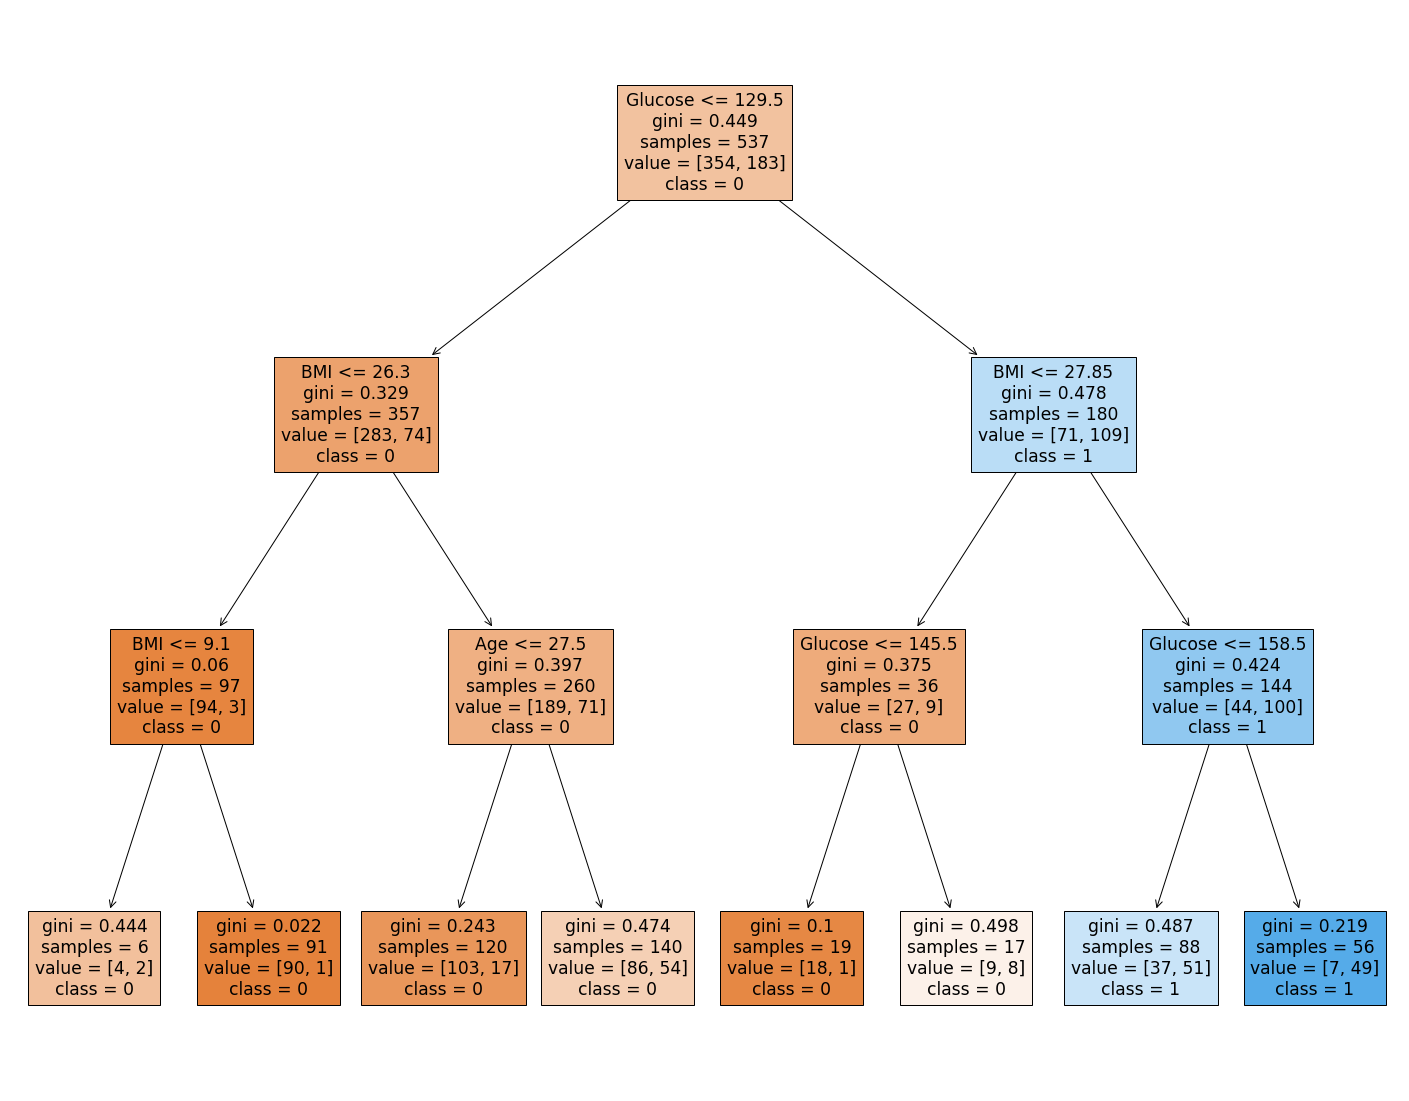

In [30]:
feature_name=["Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]
target_name=["0","1"]
fig=plt.figure(figsize=(25,20))
plot=tree.plot_tree(clf,
                   feature_names=feature_name,
                   class_names=target_name,
                   filled=True)
fig.savefig("Tree1.png")

In [31]:
clf=DecisionTreeClassifier(criterion="entropy",max_depth=3)
clf=clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)

In [32]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7705627705627706


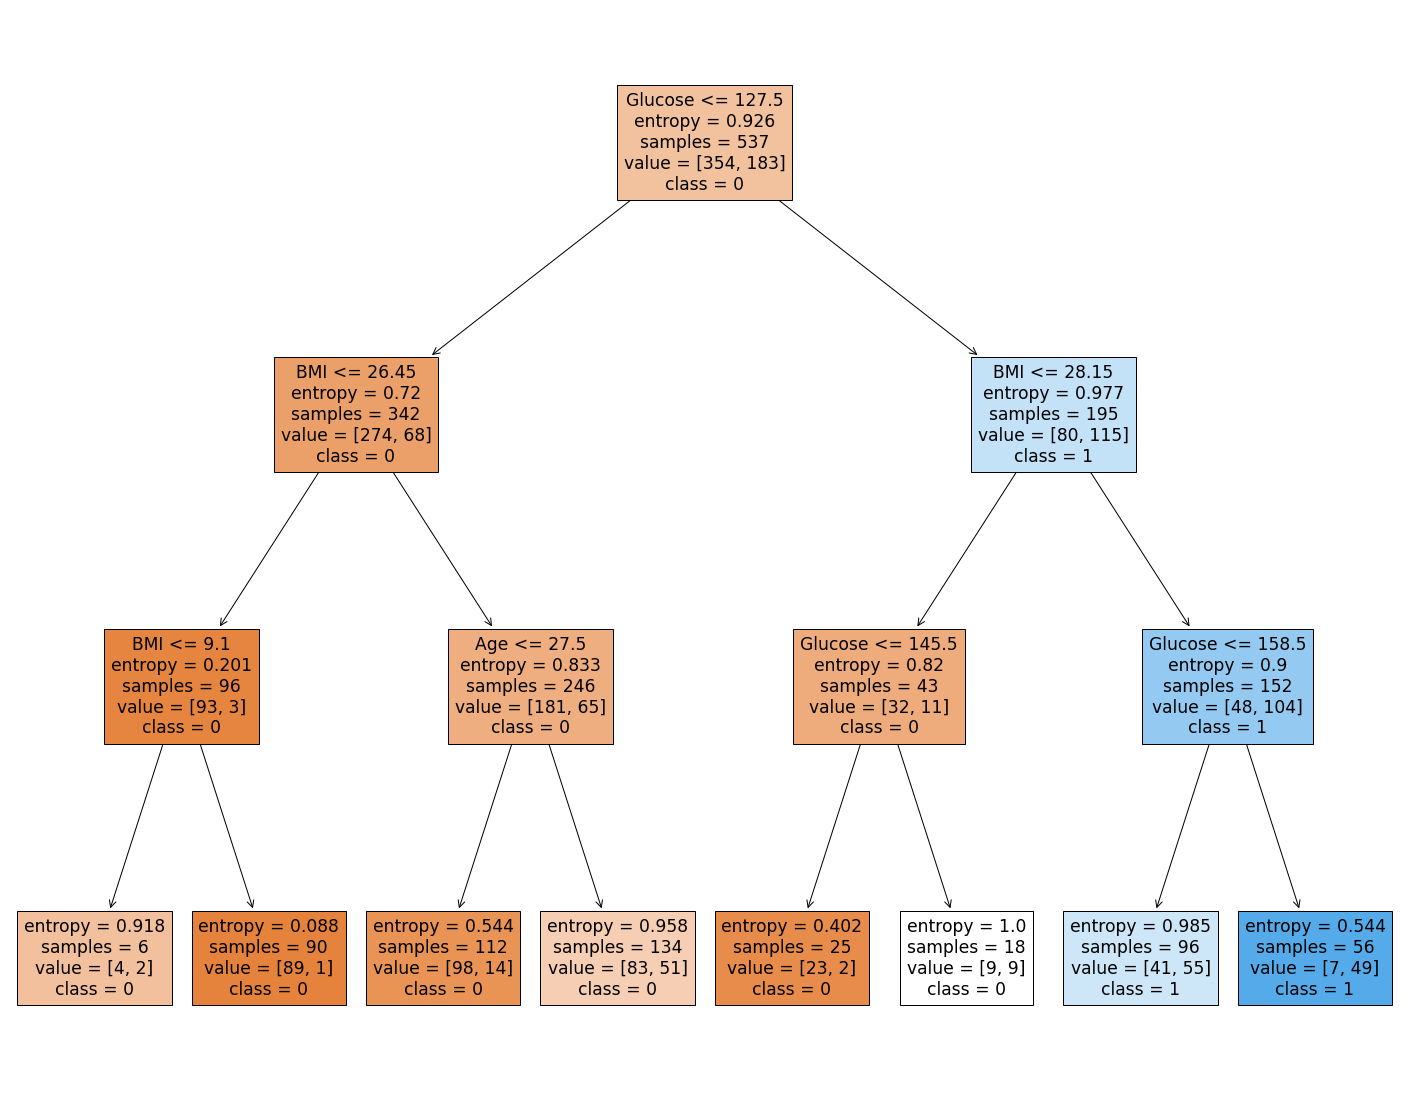

In [33]:
feature_name=["Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]
target_name=["0","1"]
fig=plt.figure(figsize=(25,20))
plot=tree.plot_tree(clf,
                   feature_names=feature_name,
                   class_names=target_name,
                   filled=True)
fig.savefig("Tree2.png")